In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
import codesModel as codeM


In [2]:
# Opciones de pandas
rows, cols = 50, 50
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas

In [3]:
data = pd.read_csv('dataTest.csv', header=[0,1], index_col=0)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)
data

Attributes    Close                                        CloseNext  \
Symbol          BDX        GL       IBM       NSC      PEP       BDX   
1985-03-01    3.000    2.8135   33.9688    7.3056    2.490     2.922   
1985-03-04    2.922    2.6217   33.7500    7.2639    2.464     2.867   
1985-03-05    2.867    2.6857   33.7500    7.2222    2.516     2.844   
1985-03-06    2.844    2.6697   33.2188    7.2778    2.477     2.836   
1985-03-07    2.836    2.6217   32.5313    7.4444    2.471     2.805   
...             ...       ...       ...       ...      ...       ...   
2021-06-07  239.560  106.4700  148.0200  274.8200  147.750   239.250   
2021-06-08  239.250  106.3800  149.0700  275.4600  146.370   243.350   
2021-06-09  243.350  104.8200  150.6700  273.7600  146.100   244.565   
2021-06-10  244.565  105.0550  151.2233  273.6700  147.510       NaN   
1985-09-27      NaN       NaN   30.8750       NaN      NaN       NaN   

Attributes                                            High            \
Symbol            GL       IBM       NSC      PEP      BDX        GL   
1985-03-01    2.6217   33.7500    7.2639    2.464    3.000    2.8455   
1985-03-04    2.6857   33.7500    7.2222    2.516    2.977    2.8295   
1985-03-05    2.6697   33.2188    7.2778    2.477    2.922    2.7016   
1985-03-06    2.6217   32.5313    7.4444    2.471    2.898    2.6857   
1985-03-07    2.5977   32.4063    7.3194    2.464    2.844    2.6697   
...              ...       ...       ...      ...      ...       ...   
2021-06-07  106.3800  149.0700  275.4600  146.370  242.120  107.0000   
2021-06-08  104.8200  150.6700  273.7600  146.100  241.680  106.6300   
2021-06-09  105.0550  151.2233  273.6700  147.510  243.600  106.0400   
2021-06-10       NaN       NaN       NaN      NaN  245.080  105.6100   
1985-09-27       NaN   30.9688       NaN      NaN      NaN       NaN   

Attributes                                   Low                      \
Symbol           IBM       NSC      PEP      BDX        GL       IBM   
1985-03-01   34.1875    7.3472    2.516    2.922    2.7976   33.5000   
1985-03-04   34.0938    7.3472    2.490    2.906    2.5897   33.5938   
1985-03-05   33.9688    7.2639    2.528    2.859    2.6377   33.6563   
1985-03-06   33.8750    7.3194    2.522    2.844    2.6377   33.1875   
1985-03-07   33.3438    7.4444    2.490    2.813    2.6217   32.5000   
...              ...       ...      ...      ...       ...       ...   
2021-06-07  148.7400  280.0000  148.250  239.300  106.0900  147.1700   
2021-06-08  150.2000  276.6200  147.870  237.341  104.9500  148.1200   
2021-06-09  151.0700  275.9900  147.590  239.560  104.7400  148.8200   
2021-06-10  152.8400  276.1600  147.520  242.880  104.9200  150.9400   
1985-09-27   30.8750       NaN      NaN      NaN       NaN   30.8750   

Attributes                        Open                                         \
Symbol           NSC      PEP      BDX        GL       IBM       NSC      PEP   
1985-03-01    7.2361    2.451    2.922    2.8056   33.6250    7.2778    2.464   
1985-03-04    7.2361    2.451    2.961    2.8295   34.0625    7.3056    2.477   
1985-03-05    7.1667    2.464    2.906    2.6537   33.8438    7.2361    2.471   
1985-03-06    7.1667    2.471    2.891    2.6857   33.7813    7.2222    2.516   
1985-03-07    7.2778    2.445    2.844    2.6697   33.0938    7.2778    2.464   
...              ...      ...      ...       ...       ...       ...      ...   
2021-06-07  274.8000  146.710  241.200  107.0000  147.5500  280.0000  147.760   
2021-06-08  271.1600  145.915  239.910  105.9000  148.1200  274.7100  147.700   
2021-06-09  273.6200  146.020  239.560  105.9800  149.0300  275.5400  147.250   
2021-06-10  273.2400  146.130  242.920  105.6100  151.4700  275.4500  146.310   
1985-09-27       NaN      NaN      NaN       NaN   30.8750       NaN      NaN   

Attributes  ...      macd                                         momentum  \
Symbol      ...       BDX        GL       IBM       NSC  

In [4]:
#Cuál es el número de registros?
#Cuál es el número de atributos?
shape = data.shape
shape

(9145, 80)

In [6]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [12]:
stocks_list = data.xs('Close', level=0, axis=1).columns
for i in stocks_list:
    print("stock",i)
    #print(data.isin([np.inf, -np.inf]))
    print(np.isinf(data).values.sum())
    # Cual es el máximo de datos faltantes en un mismo registro?
    
    print(max(data.xs(i, level=1, axis=1).isnull().sum(axis=1)))
    
    #Cuantos datos faltantes hay por cada atributo?
    print(data.xs(i, level=1, axis=1).isnull().sum())

stock BDX
0
0
Attributes
Close        0
CloseNext    0
Volume       0
bop          0
ema200       0
macd         0
momentum     0
signal       0
std20d       0
dtype: int64
stock GL
0
0
Attributes
Close        0
CloseNext    0
Volume       0
bop          0
ema200       0
macd         0
momentum     0
signal       0
std20d       0
dtype: int64
stock IBM
0
0
Attributes
Close        0
CloseNext    0
Volume       0
bop          0
ema200       0
macd         0
momentum     0
signal       0
std20d       0
dtype: int64
stock NSC
0
0
Attributes
Close        0
CloseNext    0
Volume       0
bop          0
ema200       0
macd         0
momentum     0
signal       0
std20d       0
dtype: int64
stock PEP
0
0
Attributes
Close        0
CloseNext    0
Volume       0
bop          0
ema200       0
macd         0
momentum     0
signal       0
std20d       0
dtype: int64


## limpieza

En el primer box realizo una limpieza teniendo todas las acciones para que sea mas facil, ya que estas fechas en todas las acciones estan vacias por lo tanto se eliminan.

En el segundo box se borran estas acciones las cuales tienen muchos datos vacios

En el tercer box se hace uso de ffill 'forward fill' and will propagate last valid observation forward. inplace : If True, fill in place.

In [8]:
#borrar desde 1980 '2021-01-04'
data.drop(data.index[:data.index.get_loc('1985-03-29')], axis=0, inplace=True)
data.drop(data.index[data.index.get_loc('2020-12-30'):], axis=0, inplace=True)

In [11]:
# missing values in the data are interpolated using forward-fill (‘ffill ()’)method to propagate last valid observation forward.
data = data.fillna(method='bfill')

In [9]:
#se borran estos datos debido a la alta correlacion
attributes_to_erase = ('High','Low','Open','ma20','lower','upper','ema20')
for i in attributes_to_erase:
    data=data.drop(i, axis=1, level=0)

In [52]:
data

Attributes    Close                                       CloseNext           \
Symbol          BDX       GL       IBM       NSC      PEP       BDX       GL   
1985-03-29    3.109   2.7816   31.7500    7.1667    2.804     3.094   2.8295   
1985-04-01    3.094   2.8295   32.0313    7.2083    2.766     3.039   2.8775   
1985-04-02    3.039   2.8775   31.9375    7.2083    2.714     3.055   2.8615   
1985-04-03    3.055   2.8615   31.6250    7.2222    2.747     3.039   2.8615   
1985-04-04    3.039   2.8615   31.7500    7.1944    2.791     2.953   2.8615   
...             ...      ...       ...       ...      ...       ...      ...   
2020-12-22  245.900  91.7500  123.6100  230.5000  144.020   244.250  92.9000   
2020-12-23  244.250  92.9000  123.9000  233.1200  144.410   247.990  92.8700   
2020-12-24  247.990  92.8700  124.6900  234.3900  145.060   248.150  93.2900   
2020-12-28  248.150  93.2900  124.8200  236.7100  146.910   248.350  92.1600   
2020-12-29  248.350  92.1600  123.8000  233.9900  147.420   246.680  93.2100   

Attributes                                  Volume                      \
Symbol           IBM       NSC      PEP        BDX         GL      IBM   
1985-03-29   32.0313    7.2083    2.766   809600.0   290250.0  2780000   
1985-04-01   31.9375    7.2083    2.714  1664000.0   999000.0  3363200   
1985-04-02   31.6250    7.2222    2.747   444800.0  1108350.0  3796000   
1985-04-03   31.7500    7.1944    2.791   540800.0  3017250.0  3316000   
1985-04-04   30.9688    7.2361    2.747   217600.0  1020600.0  2147200   
...              ...       ...      ...        ...        ...      ...   
2020-12-22  123.9000  233.1200  144.410   941191.0   477805.0  4337757   
2020-12-23  124.6900  234.3900  145.060   919508.0   554256.0  2693889   
2020-12-24  124.8200  236.7100  146.910   439981.0    76085.0  1761122   
2020-12-28  123.8000  233.9900  147.420   644520.0   345523.0  3615222   
2020-12-29  124.3400  235.9800  147.310   817030.0   514751.0  3487007   

Attributes                              bop                                \
Symbol            NSC         PEP       BDX        GL       IBM       NSC   
1985-03-29   447300.0  13685400.0  1.000000  0.500000  0.083200  0.000000   
1985-04-01  1357200.0   7457400.0  0.000000  0.832985  0.818446 -0.143004   
1985-04-02  1437300.0   6652800.0 -0.900000  0.817975 -0.312600 -0.250000   
1985-04-03   377100.0   9399600.0 -0.114286  0.000000 -0.727167  0.222400   
1985-04-04   417600.0  10612800.0  0.000000  0.666667  0.285714  0.000000   
...               ...         ...       ...       ...       ...       ...   
2020-12-22   808781.0   2653806.0 -0.464615 -0.358209  0.165746  0.247492   
2020-12-23  1209222.0   2645127.0 -0.927869  0.519737  0.013605  0.324324   
2020-12-24   383082.0    883285.0  0.710345 -0.255952 -0.348315  0.354009   
2020-12-28   785210.0   2493497.0 -0.252427 -0.086705 -0.130841  0.149390   
2020-12-29   929851.0   3186688.0 -0.305476 -0.923077 -0.691964 -0.496622   

Attributes                ema200                                     \
Symbol           PEP         BDX         GL         IBM         NSC   
1985-03-29  0.157895    2.979521   2.789597   33.669291    7.281779   
1985-04-01 -0.745098    2.980660   2.789994   33.652992    7.281048   
1985-04-02 -0.675325    2.981240   2.790865   33.635923    7.280324   
1985-04-03  0.775862    2.981974   2.791568   33.615913    7.279746   
1985-04-04  0.333333    2.982542   2.792263   33.597347    7.278896   
...              ...         ...        ...         ...         ...   
2020-12-22 -0.380328  244.242965  85.685624  123.592372  206.625004   
2020-12-23 -0.052425  244.243035  85.757409  123.595433  206.888635   
2020-12-24  0.237113  244.280318  85.828181  123.606324  207.162281   
2020-12-28  0.550485  244.318822  85.902428  123.618400  207.456288   
2020-12-29 -0.134715  244.358934  85.964692  123.620207  207.720305   

Attributes                  macd                                      

In [13]:
data.to_csv('data_technical_clean.csv')

## algunos analisis individuales

<AxesSubplot:xlabel='Attributes', ylabel='Attributes'>

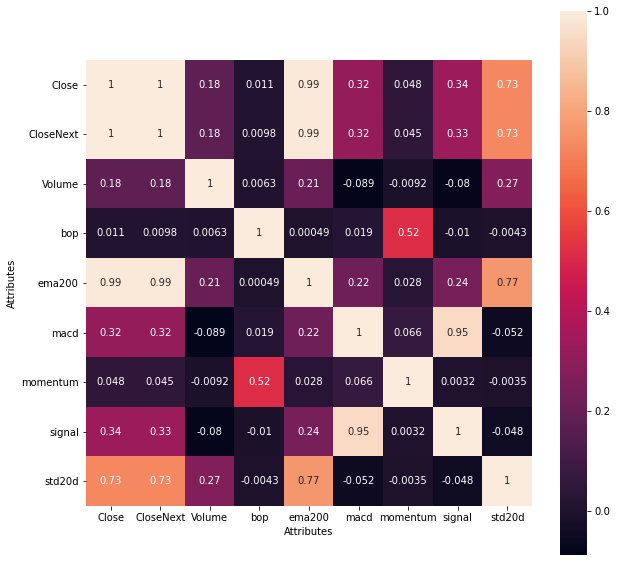

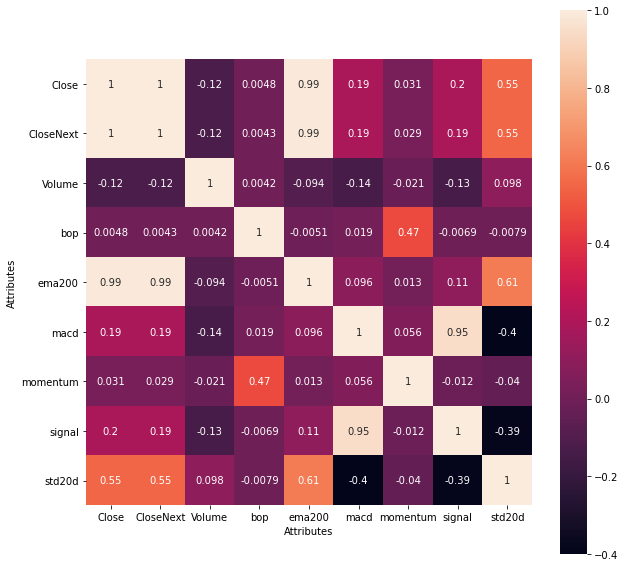

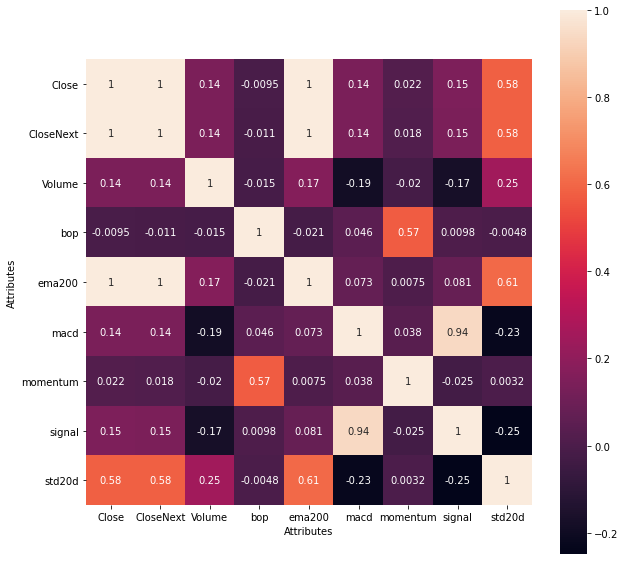

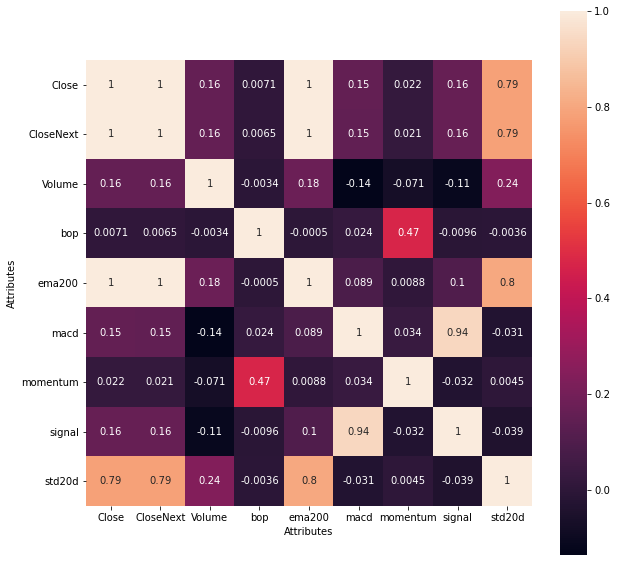

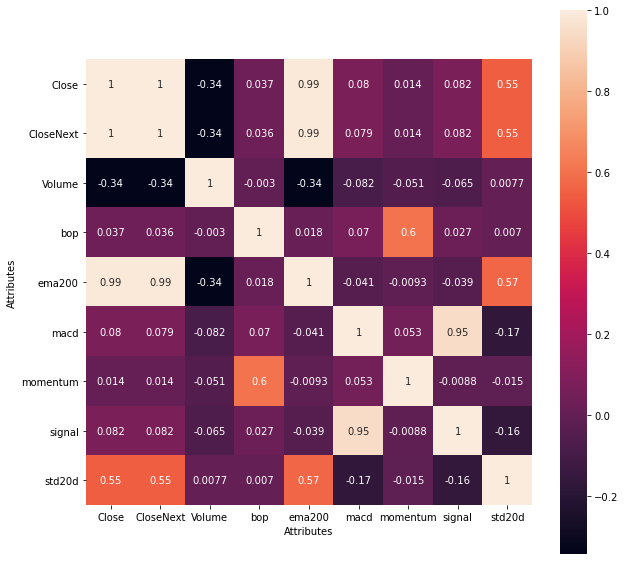

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('NSC', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('GL', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('PEP', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('BDX', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('IBM', level=1, axis=1).corr(), square=True, annot=True, ax=ax)

## Modelo base

In [ ]:
dataNSC = data.xs('NSC', level=1, axis=1)
dataNSC

In [ ]:
r2Score = r2_score(dataNSC['CloseNext'],dataNSC['Close'])
rmse = mean_squared_error(dataNSC['CloseNext'],dataNSC['Close'], squared=False)
mae=median_absolute_error(dataNSC['CloseNext'],dataNSC['Close'])
print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)